# Procesado de Imágenes de Satélite


In [7]:
import scipy
print(scipy.__version__)

1.2.1


In [8]:
# Importar Librerias
%matplotlib inline
import numpy as np
from scipy import misc
#import imageio as im
import matplotlib.pyplot as plt



## Crear un ndarray a partir de la imagen

In [9]:
from skimage import data

image_file = '../images/california.jpg'
#llegeix una imatge i reorna un ndarray. The array obtained by reading the image.
photo_data = misc.imread(image_file)
#photo_data= im.read(image_file)

type(photo_data)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """


numpy.ndarray

In [10]:
# una altra forma de llegir una imatge com una array sense utilitzar la funció imread 
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

image_file = "../images/california.jpg"
#leer foto como array, però en mode lectura, si es vol moficicar s'ha de fer una còpia
photo_data=mpimg.imread(image_file)

print( type(photo_data) ) 



<class 'numpy.ndarray'>


In [11]:
# legir una imatge com una array sense utilitzar la funció imread i que la imatge es pugui modificar
import imageio

m2=imageio.imread(image_file)

print( type(photo_data) ) 
photo_data.shape


<class 'numpy.ndarray'>


(3725, 4797, 3)

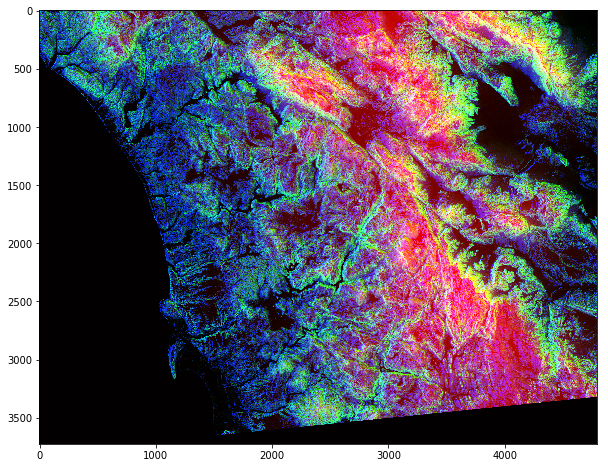

In [12]:
plt.figure(figsize=(10,10))
plt.imshow(photo_data)

In [13]:
photo_data.shape

#print(photo_data)

(3725, 4797, 3)

# Características de la Imagen
Tenemos una matriz de 3725x4797 pixeles x 3 colores.

Los colores se especifican en un vector de 3 valores: (Red, Green, Blue).
- Red: especifica la altitud
- Green: especifica la pendiente
- Blue: especifica la orientación de la pendiente

In [14]:
photo_data.size

53606475

In [15]:
# colors max i min que conté
photo_data.min(), photo_data.max()

(0, 255)

In [16]:
photo_data.mean()

75.8299354508947

# Consultar un Pixel de la Imagen

In [17]:
photo_data[150, 250]

array([ 17,  35, 255], dtype=uint8)

In [18]:
#consultem la psosicio 1 del array que va de 0 a 2
photo_data[150, 250, 1]

35

In [19]:
photo_data[150, 250, 2]

255

# Modificar un Pixel con ceros

# Modificar un rango de pixels

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


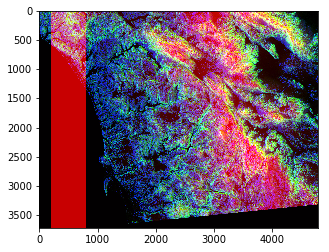

In [20]:
photo_data = misc.imread(image_file)
# seleccionas todas las filas y de la columna 200 a la 800 ponemos el color 200 a la primera posición del array de colores
photo_data[:, 200:800, 0] = 200
plt.figure(figsize=(5,5))
plt.imshow(photo_data)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


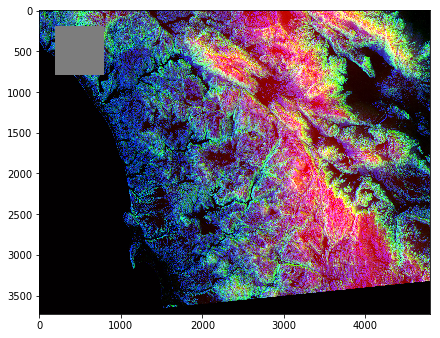

In [21]:
photo_data = misc.imread(image_file)
# asignamos 125 a los ters valores de color y da gris
photo_data[200:800, 200:800] = 125
plt.figure(figsize=(7,7))
plt.imshow(photo_data)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


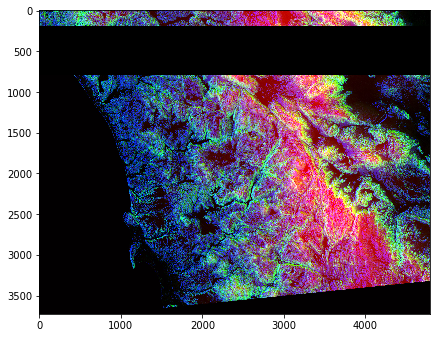

In [22]:
photo_data = misc.imread(image_file)
# asianar 0 a las tres valores de color negro
photo_data[200:800, :] = 0
plt.figure(figsize=(7,7))
plt.imshow(photo_data)

# Filtrar pixels por intensidad

In [23]:
# photo_data = misc.imread(image_file)
photo_data=mpimg.imread(image_file)
print("Shape of photo_data:", photo_data.shape)

#filtramos valores por una condición, en este caso que todos los valores sean menores de 125

low_value_filter = photo_data < 125
print("Shape of low_value_filter:", low_value_filter.shape)

Shape of photo_data: (3725, 4797, 3)
Shape of low_value_filter: (3725, 4797, 3)


In [24]:
photo_data[100,100]

array([ 39, 143, 156], dtype=uint8)

In [25]:
low_value_filter[100,100]


array([ True, False, False])

ValueError: assignment destination is read-only

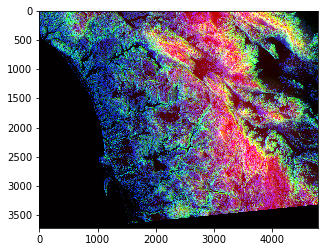

In [26]:
# dos funciones para presentar la imagen
plt.figure(figsize=(5,5))
plt.imshow(photo_data)

#asignar 0 a los valores de colores que cumplen mi filto True, False, False
photo_data[low_value_filter] = 0
plt.figure(figsize=(5,5))
plt.imshow(photo_data)

# Filtrado de Imágenes

<img src="../images/circle.png" align="left" style="width:550px;height:330px;"/>

In [28]:
total_rows, total_cols, total_layers = photo_data.shape
#total_rows, total_cols, total_layers = (12, 12, 3)
print("photo_data = ", photo_data.shape)

X, Y = np.ogrid[:total_rows, :total_cols]
print("X = ", X.shape, " and Y = ", Y.shape)

photo_data =  (3725, 4797, 3)
X =  (3725, 1)  and Y =  (1, 4797)


In [ ]:
Y

In [ ]:
X

In [29]:
center_row, center_col = total_rows / 2, total_cols / 2
print("center_row = ", center_row, "AND center_col = ", center_col)
#print(X - center_row)
#print(Y - center_col)
dist_from_center = (X - center_row)**2 + (Y - center_col)**2
print(dist_from_center)
radius = (total_rows / 2)**2
print("Radius = ", radius)

circular_mask = (dist_from_center > radius)
print(circular_mask)

#print(circular_mask[0:100,0:100])

center_row =  1862.5 AND center_col =  2398.5
[[9221708.5 9216912.5 9212118.5 ... 9207326.5 9212118.5 9216912.5]
 [9217984.5 9213188.5 9208394.5 ... 9203602.5 9208394.5 9213188.5]
 [9214262.5 9209466.5 9204672.5 ... 9199880.5 9204672.5 9209466.5]
 ...
 [9210542.5 9205746.5 9200952.5 ... 9196160.5 9200952.5 9205746.5]
 [9214262.5 9209466.5 9204672.5 ... 9199880.5 9204672.5 9209466.5]
 [9217984.5 9213188.5 9208394.5 ... 9203602.5 9208394.5 9213188.5]]
Radius =  3468906.25
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


53606475


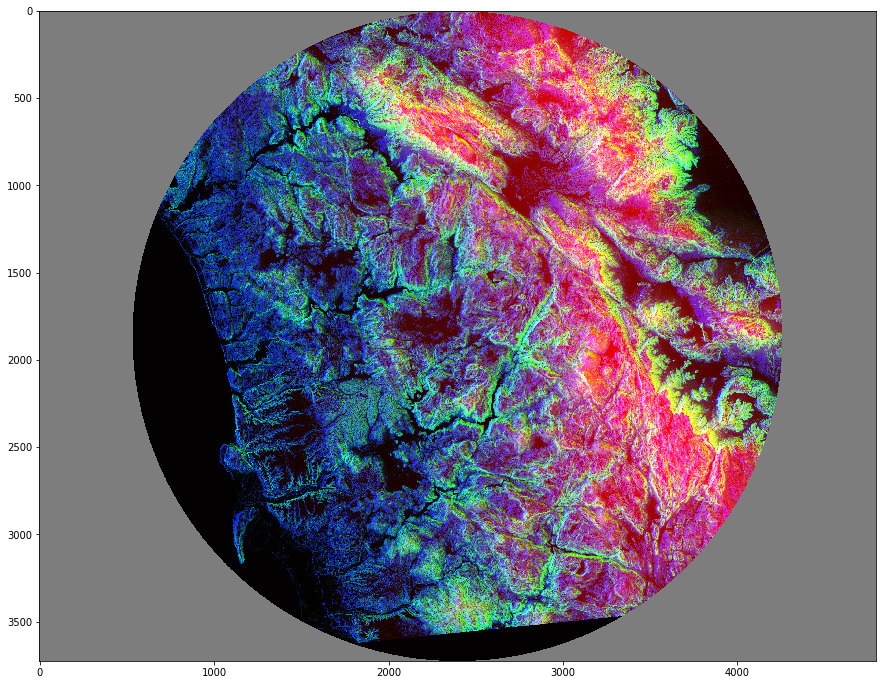

In [30]:
photo_data = misc.imread(image_file)
print(photo_data.size)
photo_data[circular_mask] = 125
plt.figure(figsize=(15,15))
plt.imshow(photo_data)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.


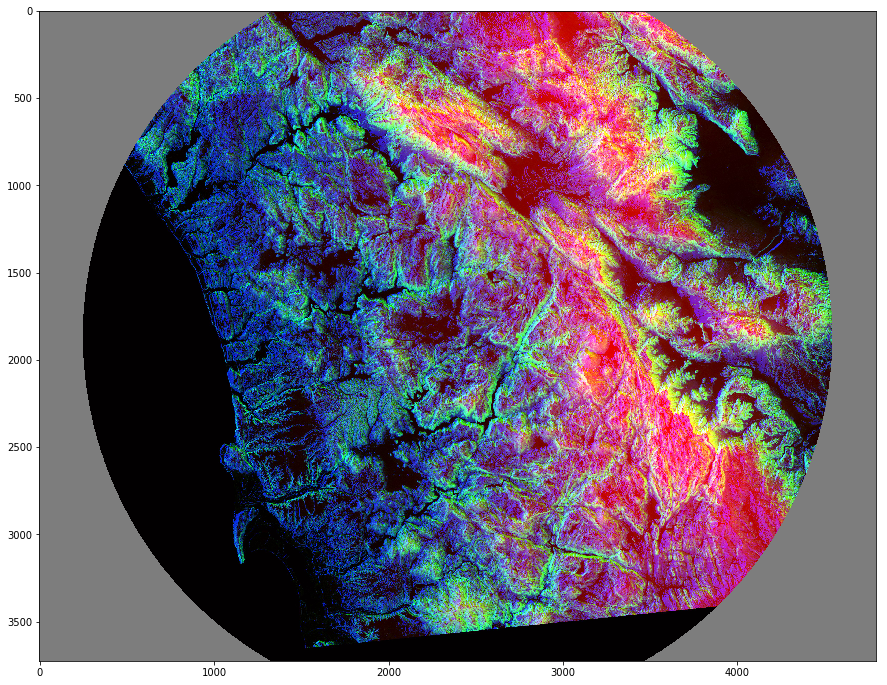

In [31]:
distancia=center_row**2 +center_col**2
circular_mask = (dist_from_center > distancia/2)

photo_data = misc.imread(image_file)
photo_data[circular_mask] = 125
plt.figure(figsize=(15,15))
plt.imshow(photo_data)

# Otros filtrados

In [32]:
X, Y = np.ogrid[:total_rows, :total_cols]
half_upper = X < center_row # this line generates a mask for all rows above the center

half_upper_mask = np.logical_and(half_upper, circular_mask)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


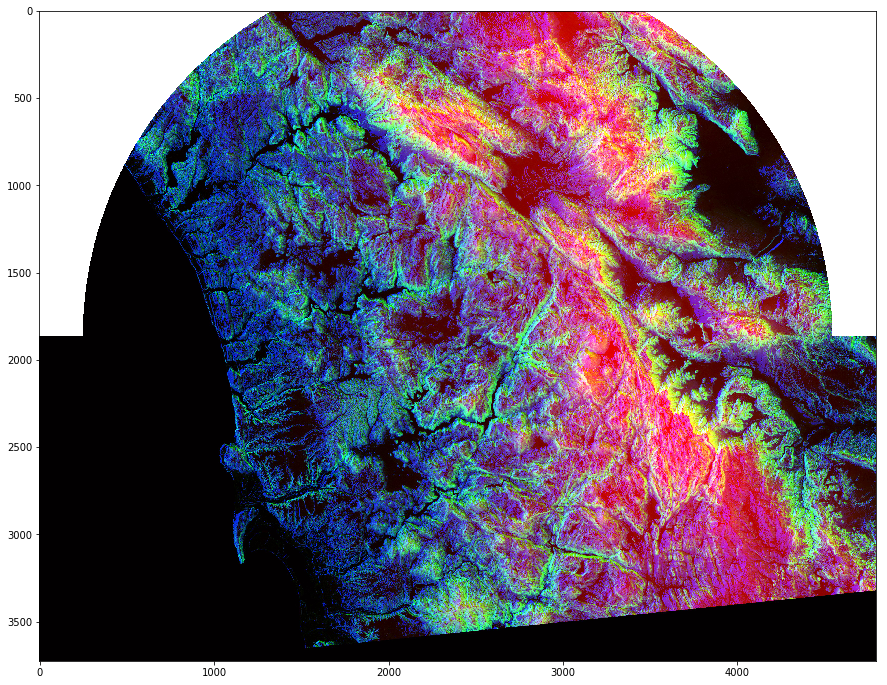

In [35]:
import random
photo_data = misc.imread(image_file)
photo_data[half_upper_mask] = 255
#photo_data[half_upper_mask] = random.randint(200,255)
plt.figure(figsize=(15,15))
plt.imshow(photo_data)

# Otros Filtros de Color

## Filtrado de Rojos

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


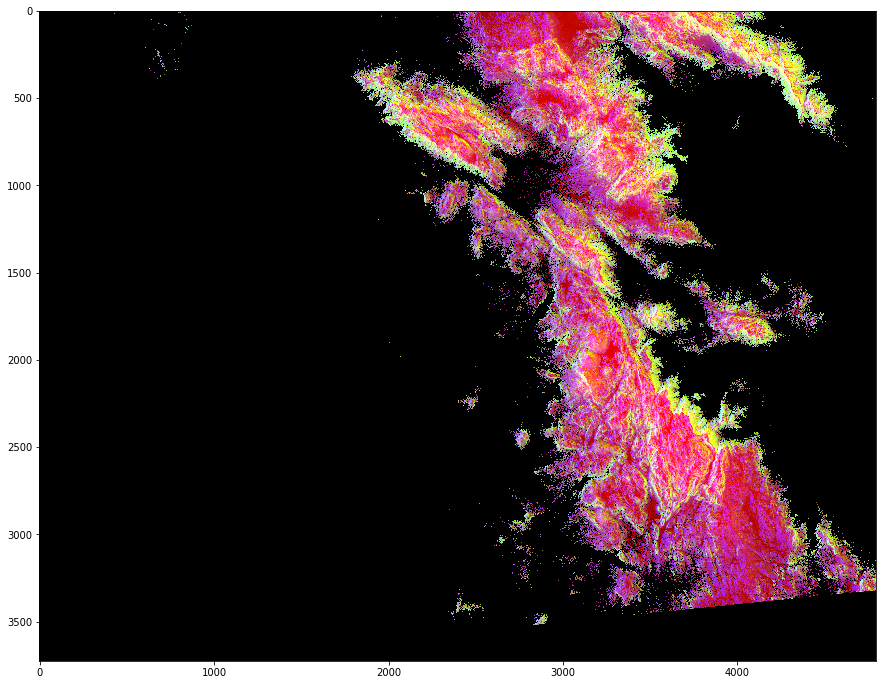

In [36]:
photo_data = misc.imread(image_file)
red_mask   = photo_data[:, : ,0] < 150

photo_data[red_mask] = 0
plt.figure(figsize=(15,15))
plt.imshow(photo_data)

## Filtrado de Verdes

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


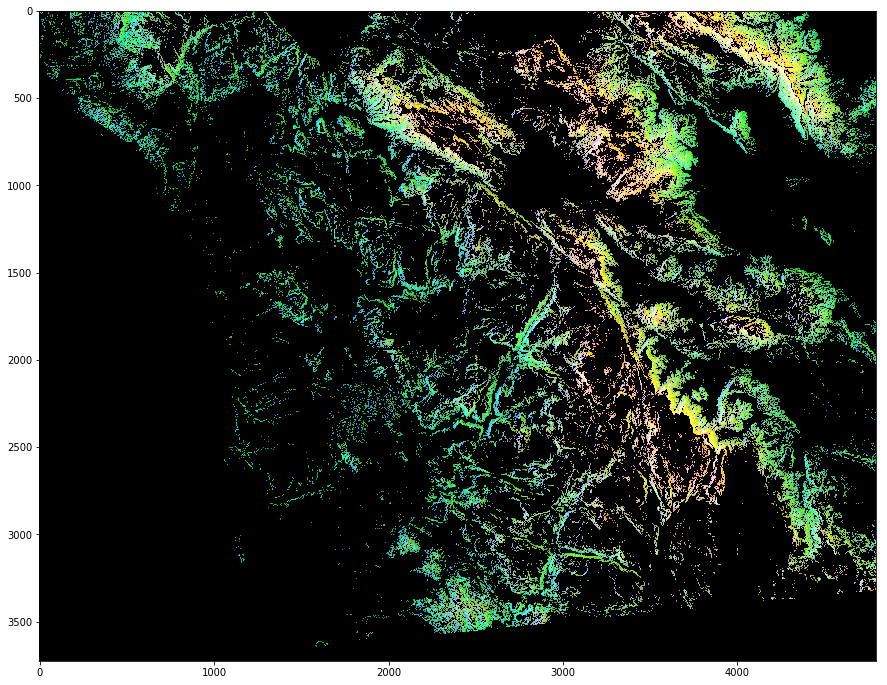

In [37]:
photo_data = misc.imread(image_file)
green_mask = photo_data[:, : ,1] < 150

photo_data[green_mask] = 0
plt.figure(figsize=(15,15))
plt.imshow(photo_data)

## Filtrado de Azules

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


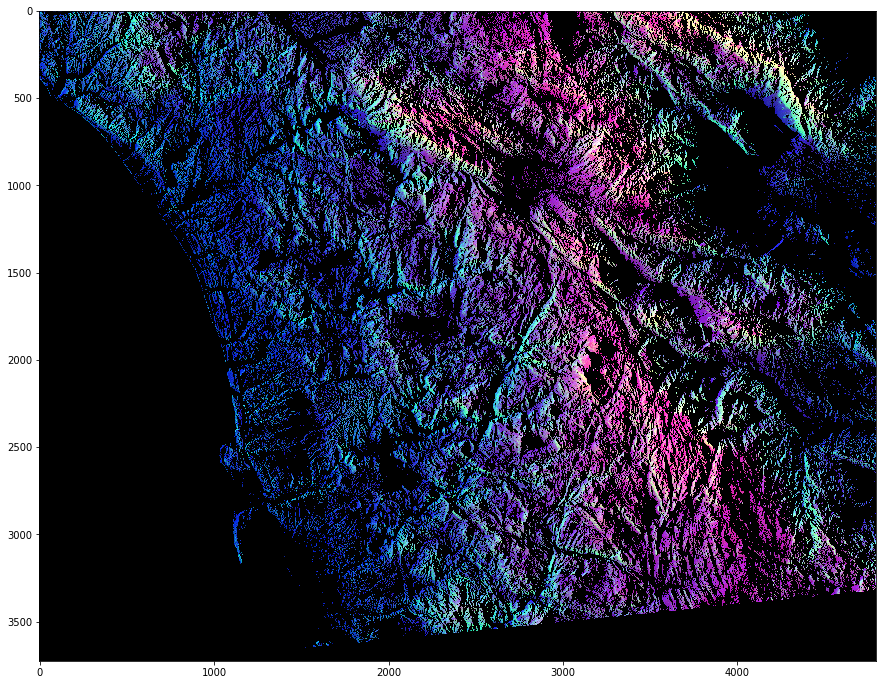

In [40]:
photo_data = misc.imread(image_file)
blue_mask  = photo_data[:, : ,2] < 150

photo_data[blue_mask] = 0
plt.figure(figsize=(15,15))
plt.imshow(photo_data)

## Filtrado de Rojos, Verdes y Azules

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


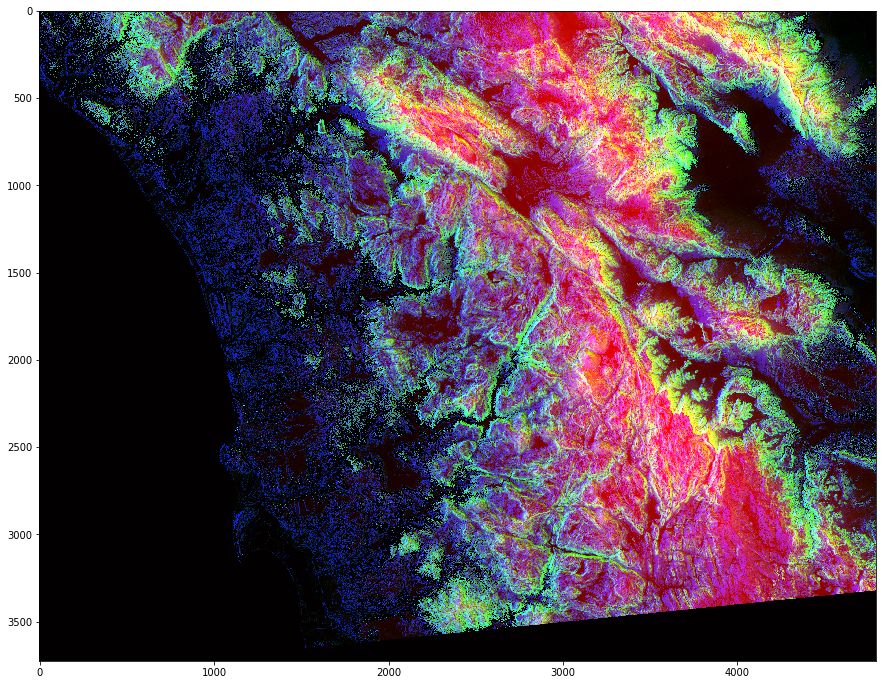

In [42]:
photo_data = misc.imread(image_file)

red_mask   = photo_data[:, : ,0] < 50
green_mask = photo_data[:, : ,1] > 50
blue_mask  = photo_data[:, : ,2] < 50

final_mask = np.logical_and(red_mask, green_mask, blue_mask)
photo_data[final_mask] = 0
plt.figure(figsize=(15,15))
plt.imshow(photo_data)